In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### The reason I did this was to determine what individual foods studied of these 168 are best for my child, and which are worst.  I understand that this study doesn't offer multiple tests of the same products, and that this is a small sample size.

From this analysis I want to determine:

1.  What are the absolute worst foods?
2.  What are the absolute best foods?
3.  Which are the best & worst brands?

##### Importing csv as dataframe, first column (0) set as index.

In [2]:
df = pd.read_csv(r'Baby_Metals_mod_data.csv',  index_col=0)
df['Metals']=df['Arsenic (inorganic, ppb)']+df['Lead (ppb)'] +df['Cadmium (ppb)'] + df['Mercury (total, ppb)']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C98D8AA5C8>]],
      dtype=object)

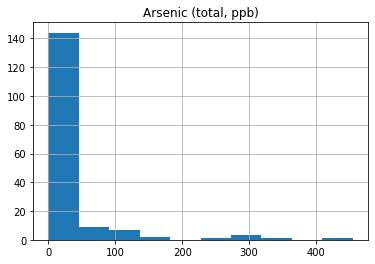

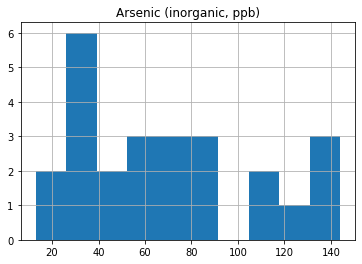

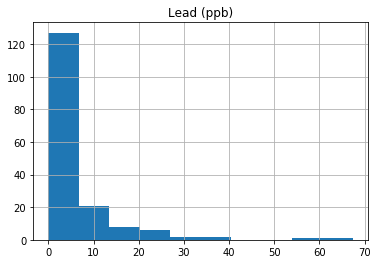

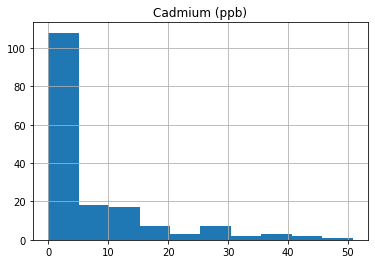

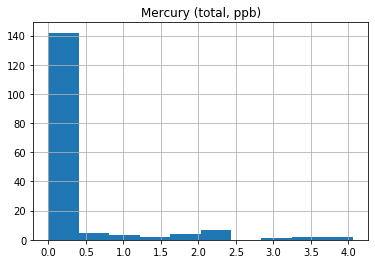

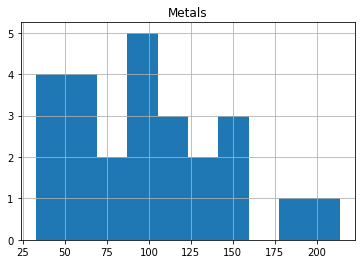

In [3]:
df.hist(column='Arsenic (total, ppb)')
df.hist(column='Arsenic (inorganic, ppb)')
df.hist(column='Lead (ppb)')
df.hist(column='Cadmium (ppb)')
df.hist(column='Mercury (total, ppb)')
df.hist(column='Metals')

#### From only the histograms, it looks like a decent  food would have:
- 'Arsenic (total, ppb)'  Less than 50 ppb
- 'Arsenic (inorganic, ppb)' less than 50 ppb
- 'Lead (ppb)' less than 10 ppb
- 'Cadmium (ppb)' less than 5 ppb
- 'Mercury (total, ppb)' less than 0.5 ppb

In [4]:
df2 = df[(df['Arsenic (total, ppb)'] < 50) & (df['Arsenic (inorganic, ppb)'] < 50)
        & (df['Lead (ppb)'] < 10) & (df['Cadmium (ppb)'] < 5)
        & (df['Mercury (total, ppb)'] < 0.5)]
df2.head()

,Brand,Food,Food type,"Arsenic (total, ppb)","Arsenic (inorganic, ppb)",Lead (ppb),Cadmium (ppb),"Mercury (total, ppb)",Metro area where purchased,Retailer,Metals
54,HappyBABY,HappyBABY Sweet Potatoes - Stage 1,Veggie-single-sweetpotato,27.5,29.0,2.0,1.6,0.0,"Columbia, SC",Publix,32.6


This sucks.  Only one of 168 foods meets this criteria; and the food that meets it is Sweet potatoes (a food HBBF strongly recommends avoiding due to high toxic metal containments).

This could be due to NaN being in many of the columns.  I will replace thouse with 0's and repeat the search.

In [5]:
df3 = df.fillna(0)  #Metals that had a NaN turned to 0 need to put the equation back in.
df3['Metals']=df3['Arsenic (inorganic, ppb)']+df3['Lead (ppb)'] +df3['Cadmium (ppb)'] + df3['Mercury (total, ppb)']
df3 = df3.sort_values(by=['Metals'], ascending=False)
df3.head(10)

,Brand,Food,Food type,"Arsenic (total, ppb)","Arsenic (inorganic, ppb)",Lead (ppb),Cadmium (ppb),"Mercury (total, ppb)",Metro area where purchased,Retailer,Metals
5,Healthy Times,Healthy Times Organic Brown Rice Cereal - 4+ m...,Cereal-rice,153.0,133.0,67.4,12.1,1.530,"Washington, DC",amazon.com,214.030
1,BioKinetics,BioKinetics BioKinetics Brown Rice Organic Spr...,Cereal-rice,353.0,144.0,3.1,31.7,2.320,"Washington, DC",amazon.com,181.120
139,O Organics (Albertson/Safeway),O Organics Organic Puffs - Apple Strawberry (A...,Snack-ricepuffs,309.0,133.0,7.5,15.2,3.290,"Washington, DC",Safeway,158.990
140,Simple Truth Organic (Kroger),Simple Truth Organic Whole Grain Puffs Broccol...,Snack-ricepuffs,307.0,126.0,9.8,13.5,3.680,"Cincinnati, OH",Kroger,152.980
2,Earth's Best,Earth's Best Whole Grain Rice Cereal,Cereal-rice,138.0,113.0,22.5,14.7,2.410,"San Diego, CA",99 Cents Only Stores,152.610
3,Earth's Best,Earth's Best Whole Grain Rice Cereal,Cereal-rice,126.0,107.0,17.8,13.4,2.190,"Portland, ME",Hannaford,140.390
141,Sprout,Sprout Organic Quinoa Puffs Baby Cereal Snack ...,"Snack-puffs,containsrice",107.0,47.0,39.3,41.5,1.310,"Washington, DC",amazon.com,129.110
137,HappyBABY,HappyBABY Superfood Puffs Organic Grain Snack ...,Snack-ricepuffs,295.0,91.0,3.7,12.2,1.940,"Washington, DC",amazon.com,108.840
134,Comforts (Kroger),Comforts (Kroger) Blueberry Little Puffs Cerea...,Snack-ricepuffs,83.3,61.0,8.5,36.9,0.835,"Cincinnati, OH",Kroger,107.235
6,Kitchdee Organic,Kitchdee Organic Baby Cereal Rice and Lentil -...,Cereal-rice,79.3,78.0,10.9,13.1,4.060,"Washington, DC",amazon.com,106.060


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C98DA4C808>]],
      dtype=object)

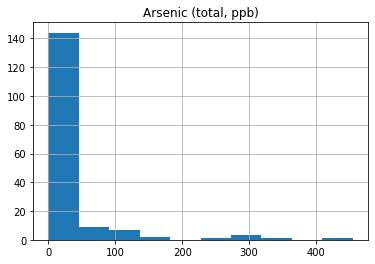

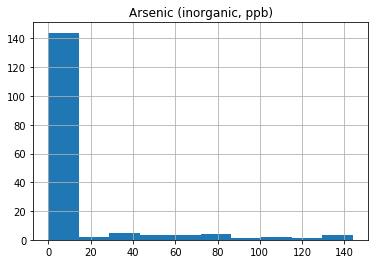

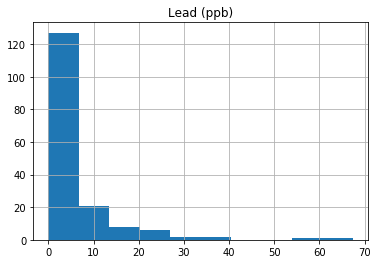

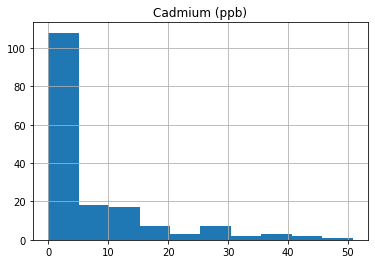

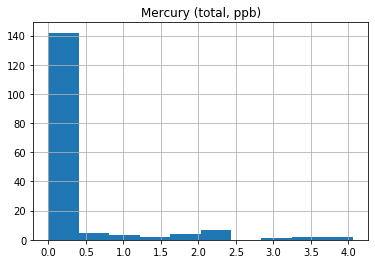

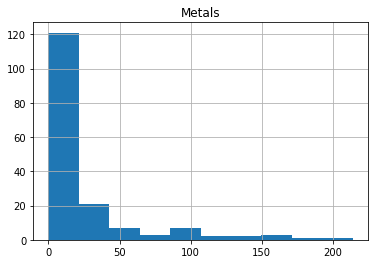

In [6]:
df3.hist(column='Arsenic (total, ppb)')
df3.hist(column='Arsenic (inorganic, ppb)')
df3.hist(column='Lead (ppb)')
df3.hist(column='Cadmium (ppb)')
df3.hist(column='Mercury (total, ppb)')
df3.hist(column='Metals')

In [7]:
df4 = df3[(df3['Arsenic (total, ppb)'] < 50) & (df3['Arsenic (inorganic, ppb)'] < 50)
        & (df3['Lead (ppb)'] < 10) & (df3['Cadmium (ppb)'] < 5)
        & (df3['Mercury (total, ppb)'] < 0.5)]
df4.shape

(92, 11)

In [8]:
df4.head()

,Brand,Food,Food type,"Arsenic (total, ppb)","Arsenic (inorganic, ppb)",Lead (ppb),Cadmium (ppb),"Mercury (total, ppb)",Metro area where purchased,Retailer,Metals
54,HappyBABY,HappyBABY Sweet Potatoes - Stage 1,Veggie-single-sweetpotato,27.5,29.0,2.0,1.6,0.000,"Columbia, SC",Publix,32.600
44,Beech-Nut,Beech-Nut Organics Just Sweet Potatoes - Stage...,Veggie-single-sweetpotato,3.8,0.0,7.3,2.7,0.000,"Cincinnati, OH",Kroger,10.000
89,HappyBABY,"HappyBABY Simple Combos Apples, Spinach & Kale...",Fruitandveggie-mixed,3.0,0.0,4.3,4.9,0.182,"Portland, ME",Hannaford,9.382
166,Sprout,Organic Crispy Chews Red Fruit Beet & Berry wi...,Snack-other,19.2,0.0,7.7,1.2,0.185,"Charlottesville, VA",Wegmans,9.085
98,Gerber,Gerber Carrot Sweet Potato Pea - Sitter 2nd Fo...,Veggie-mixed,2.4,0.0,6.7,2.1,0.000,"Gambell, AK",ANICA Native Store,8.800


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C98D9BB608>]],
      dtype=object)

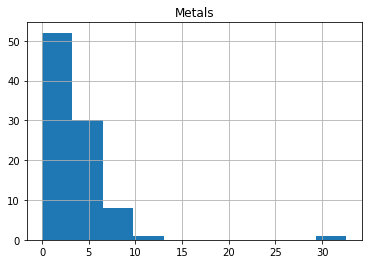

In [9]:
df4.hist(column='Metals')

In [10]:
df3.Metals.max

<bound method Series.max of 5      214.03
1      181.12
139    158.99
140    152.98
2      152.61
        ...  
74       0.00
72       0.00
70       0.00
128      0.00
167      0.00
Name: Metals, Length: 168, dtype: float64>

In [11]:
df5 = df3[(df3['Metals'] < 3)]
df5.shape

(50, 11)

In [12]:
df6 = df5.sort_values(by=['Metals'])
df6.head(50)

,Brand,Food,Food type,"Arsenic (total, ppb)","Arsenic (inorganic, ppb)",Lead (ppb),Cadmium (ppb),"Mercury (total, ppb)",Metro area where purchased,Retailer,Metals
167,Gerber,Soothe Probiotic Colic Drops,Supplement,4.4,0.0,0.0,0.0,0.000,"Washington, DC",walmart.com,0.000
111,Repone,Repone Suero/Electrolyte Solution with Zinc Fr...,Drink-not100%fruit,0.0,0.0,0.0,0.0,0.000,"San Diego, CA",Family Dollar,0.000
103,Apple & Eve,Apple & Eve Elmo's Punch - 100% Juice Organics,Juice-100%fruit,0.0,0.0,0.0,0.0,0.000,"Boulder, CO",Whole Foods Market,0.000
76,Meijer,Meijer Baby Bananas - 2nd Stage,Fruit-single-banana,0.0,0.0,0.0,0.0,0.000,"Detroit, MI",Meijer,0.000
78,Orchard Naturals,Mandarin Oranges in Light Syrup,Fruit-single-other,0.0,0.0,0.0,0.0,0.000,"Houston, TX",Dollar Tree,0.000
128,Beech-Nut,Beech-Nut Classics Chicken & Chicken Broth - 1,Meat,0.0,0.0,0.0,0.0,0.000,"Washington, DC",Safeway,0.000
74,Beech-Nut,"Naturals Bananas - Stage 1, from about 4 months",Fruit-single-banana,0.0,0.0,0.0,0.0,0.000,"Albany, NY",buybuyBABY,0.000
72,Mott's,Mott's Applesauce Apple,Fruit-single-apple,0.0,0.0,0.0,0.0,0.000,"San Diego, CA",Family Dollar,0.000
70,Beech-Nut,"Organic Just Apples - Stage 1, from about 4 mo...",Fruit-single-apple,0.0,0.0,0.0,0.0,0.000,"Charlottesville, VA",Wegmans,0.000
75,Gerber,Banana - Sitter 2nd Foods,Fruit-single-banana,0.0,0.0,0.0,0.0,0.000,"Gambell, AK",ANICA Native Store,0.000


1.  what are the best foods to buy?

df7 shows the 10 foods without any measurable toxic heavy metals (excluding 'Aresnic (total, ppb)).

In [13]:
df7 = df5[(df5['Metals'] == 0)]
df7.head(50)

,Brand,Food,Food type,"Arsenic (total, ppb)","Arsenic (inorganic, ppb)",Lead (ppb),Cadmium (ppb),"Mercury (total, ppb)",Metro area where purchased,Retailer,Metals
111,Repone,Repone Suero/Electrolyte Solution with Zinc Fr...,Drink-not100%fruit,0.0,0.0,0.0,0.0,0.0,"San Diego, CA",Family Dollar,0.0
103,Apple & Eve,Apple & Eve Elmo's Punch - 100% Juice Organics,Juice-100%fruit,0.0,0.0,0.0,0.0,0.0,"Boulder, CO",Whole Foods Market,0.0
76,Meijer,Meijer Baby Bananas - 2nd Stage,Fruit-single-banana,0.0,0.0,0.0,0.0,0.0,"Detroit, MI",Meijer,0.0
78,Orchard Naturals,Mandarin Oranges in Light Syrup,Fruit-single-other,0.0,0.0,0.0,0.0,0.0,"Houston, TX",Dollar Tree,0.0
75,Gerber,Banana - Sitter 2nd Foods,Fruit-single-banana,0.0,0.0,0.0,0.0,0.0,"Gambell, AK",ANICA Native Store,0.0
74,Beech-Nut,"Naturals Bananas - Stage 1, from about 4 months",Fruit-single-banana,0.0,0.0,0.0,0.0,0.0,"Albany, NY",buybuyBABY,0.0
72,Mott's,Mott's Applesauce Apple,Fruit-single-apple,0.0,0.0,0.0,0.0,0.0,"San Diego, CA",Family Dollar,0.0
70,Beech-Nut,"Organic Just Apples - Stage 1, from about 4 mo...",Fruit-single-apple,0.0,0.0,0.0,0.0,0.0,"Charlottesville, VA",Wegmans,0.0
128,Beech-Nut,Beech-Nut Classics Chicken & Chicken Broth - 1,Meat,0.0,0.0,0.0,0.0,0.0,"Washington, DC",Safeway,0.0
167,Gerber,Soothe Probiotic Colic Drops,Supplement,4.4,0.0,0.0,0.0,0.0,"Washington, DC",walmart.com,0.0


In [14]:
df8 = df.groupby('Brand').nunique()
df8.drop(df8.columns.difference(['Food']), 1, inplace=True)
df8.columns = ['Total']
df8.head()

,Total
Brand,
365 organic(Whole Foods),2
Apple & Eve,1
Applesnax,1
Baby Mum-Mum,1
Baby's Only Organic,1


In [15]:
df9 = df5.groupby('Brand').nunique()
df9.drop(df9.columns.difference(['Food']), 1, inplace=True)
df9.columns = ['Low Metals']
df9.head()

,Low Metals
Brand,
365 organic(Whole Foods),1
Apple & Eve,1
Applesnax,1
Baby's Only Organic,1
Beech-Nut,8


In [30]:
result = pd.concat([df8, df9], axis=1, sort=False)
result = result.fillna(0) 
result = result.astype(int)
result.head()

,Total,Low Metals
365 organic(Whole Foods),2,1
Apple & Eve,1,1
Applesnax,1,1
Baby Mum-Mum,1,0
Baby's Only Organic,1,1


In [31]:
result.Total.min()

1

In [32]:
result.Total.max()

39

In [33]:
result.Total.mode()

0    1
dtype: int32

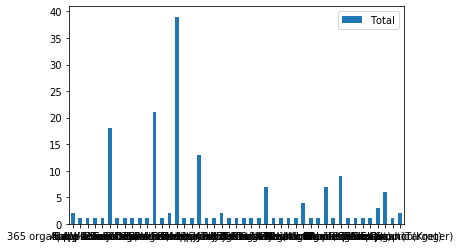

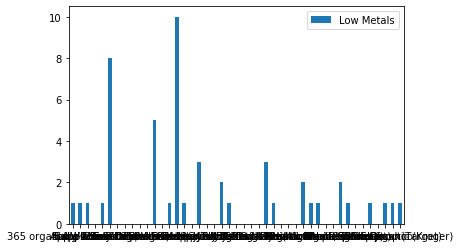

In [34]:
ax = result.plot.bar(y='Total', rot=0)
ax1 = result.plot.bar(y='Low Metals', rot=0)

In [35]:
df10 = df3.groupby('Brand', as_index=True)['Metals'].mean()
df11 = df3.groupby('Brand', as_index=True)['Metals'].max()
df12 = df3.groupby('Brand', as_index=True)['Metals'].min()

In [36]:
result['%Good']=result['Low Metals']/result['Total']
result = result.sort_values(by=['%Good'])
result = pd.concat([result, df10, df11, df12], axis=1, sort=False)
result = result[(result['Total'] > 4)]
result.columns = ['Total', 'Low Metals', '%Good', 'Metals', 'Max', 'Min']
result['Range']= result['Max'] - result['Min']
result.head(8)

,Total,Low Metals,%Good,Metals,Max,Min,Range
Parent's Choice (Walmart),7,0,0.000000,23.413000,97.350,4.6,92.750
Sprout,6,1,0.166667,27.773333,129.110,0.8,128.310
Plum Organics,9,2,0.222222,12.896111,66.700,0.9,65.800
HappyBABY,13,3,0.230769,26.565857,108.840,1.8,107.040
Earth's Best,21,5,0.238095,23.185409,152.610,0.8,151.810
Gerber,39,10,0.256410,18.913718,95.300,0.0,95.300
Meijer,7,3,0.428571,10.931000,49.010,0.0,49.010
Beech-Nut,18,8,0.444444,15.504778,95.482,0.0,95.482


There are only 8 Brands tested more than 5 times in this study.  From this study the 'best' brand is Beech-Nut with 44% Good products (Good we arbitrarily defined as less than 3ppb of toxic metal contaminats).  Looking at the answer for the best foods Beech-Nut also represents 3 of the 10 foods without any measurable level of toxicicity.  Also Meijer has the lowest Toxic Metal value at 10.9ppb.

There are a few contenders for the worst brand, from just this study.  
- Parent's Choice (Walmart) is the only Brand with 5 or more items tested to not have one less than 3ppb of total Toxic Metals.
- Sprout has the highest Toxic Metal average at 27.8ppb
- Earth's Best has the most highest toxic metal value for a single item at 152.6ppb.

In [23]:
result.shape

(8, 7)